In [1]:
# imports
from Helpers.Mantels_Helpers import extract_all_files, create_tasks_for_parrelization, get_embeddings, mantel_test

2025-01-13 17:31:14.007896: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-13 17:31:14.028646: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-13 17:31:14.034957: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-13 17:31:14.050385: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-13 17:31:16.063000: W tensorflow/compiler/tf2

# Mantel's correlation Tests
 
- Brought to by the one and only Adam and the one and only Marshall

In [2]:
# Test extract all files
df = extract_all_files()
df.sample(5) 

,method,csv_file,split,Percent_of_Anchors,Best_Params,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),GRAE,Parameter STD
2511,MASH-,iris,turn,0.3,"{'knn': 6, 'page_rank': 'None', 'DTM': 'hellin...","{'42': 0.9733333333333334, '1738': 0.973333333...","{'42': 0.0008444444444444445, '1738': 0.000888...","{'42': 0.9583333333333334, '1738': 0.975, '527...","{'42': 0.9833333333333333, '1738': 0.966666666...","{'42': 1.0, '1738': 0.9333333333333333, '5271'...","{'42': 1.0, '1738': 0.9333333333333333, '5271'...","{'42': 0.9832804232804231, '1738': 0.966410912...","{'42': {'RF-OOB': 0.9625, 'KNN': 1.0, 'RF': 0....","{'knn': 0.010180925277506612, 'page_rank': 0.0..."
1243,RF-SPUD,AirfoilSelfNoise,random,0.3,"{'knn': 2, 'OD_method': 'absolute_distance', '...","{'42': -0.2094535603450527, '1738': -0.2417670...","{'42': 0.020644893402372456, '1738': 0.0191030...","{'42': -0.15909342019918649, '1738': -0.169670...","{'42': -0.19974057526751876, '1738': -0.097937...","{'42': 0.04078312401707729, '1738': 0.00537105...","{'42': 1.0048623541404873, '1738': 1.001874383...","{'42': 1.1238072881587615, '1738': 1.052619959...","{'42': {'RF-OOB': -0.11964221424104604, 'KNN':...",{}
54,RF-SPUD,ComputerHardware,even,0.3,"{'knn': 12, 'OD_method': 'default', 'agg_metho...",{'42': 0.10489237029921472},{'42': 0.0},{'42': -0.046070312096956556},{'42': 0.1066053135562639},{'42': 0.11024929927076044},{'42': 1.3232845859728946},{'42': 1.3259915818965262},"{'42': {'RF-OOB': 0.16979378326527683, 'KNN': ...",{}
1448,SPUD,ionosphere,turn,0.3,"{'knn': 42, 'OD_method': 'mean', 'agg_method':...","{'42': 0.8917378917378918, '1738': 0.891737891...","{'42': 8.11681723362635e-06, '1738': 8.1168172...","{'42': 0.9160714285714285, '1738': 0.916071428...","{'42': 0.9577464788732394, '1738': 0.985915492...","{'42': 0.9577464788732394, '1738': 0.950704225...","{'42': 0.9572627624982457, '1738': 0.950840209...","{'42': 0.9574441599089488, '1738': 0.985991199...","{'42': {'RF-OOB': 0.9267857142857143, 'KNN': 0...","{'knn': 0.10072598555751044, 'OD_method': 0.00..."
993,RF-NAMA,Parkinsons,turn,0.3,"{'OD_method': 'absolute_distance', 'agg_method...","{'42': -0.22248105137735696, '1738': -0.225003...","{'42': 6.388411045722046e-05, '1738': 6.055228...","{'42': -0.03853188689261433, '1738': -0.048829...","{'42': -0.0143199849334541, '1738': -0.0238299...","{'42': -0.0010027636192697642, '1738': -0.0028...","{'42': 0.9860866555667597, '1738': 1.009135857...","{'42': 0.9926243727543814, '1738': 1.019658709...","{'42': {'RF-OOB': -0.029498886623231302, 'KNN'...",{}


In [3]:
# Test to create tasks
tasks = create_tasks_for_parrelization(df)
tasks[:2]

[('RF-SPUD',
  'ComputerHardware',
  'even',
  {'knn': 22, 'OD_method': 'default', 'agg_method': 'log'}),
 ('RF-MASH-',
  'ComputerHardware',
  'distort',
  {'knn': 2,
   'page_rank': 'full',
   'DTM': 'log',
   'density_normalization': False})]

In [4]:
#Select the part where its iris data set for ease :)
iris_task = next(task for task in tasks if 'iris' in task[1])
print(iris_task)

('SPUD', 'iris', 'turn', {'knn': 10, 'OD_method': 'default', 'agg_method': 'log'})


In [5]:
#Test get embeddings fucntion
partial, pred, full, full_labels, pred_labels = get_embeddings(*iris_task, return_labels=True)

240 300 300


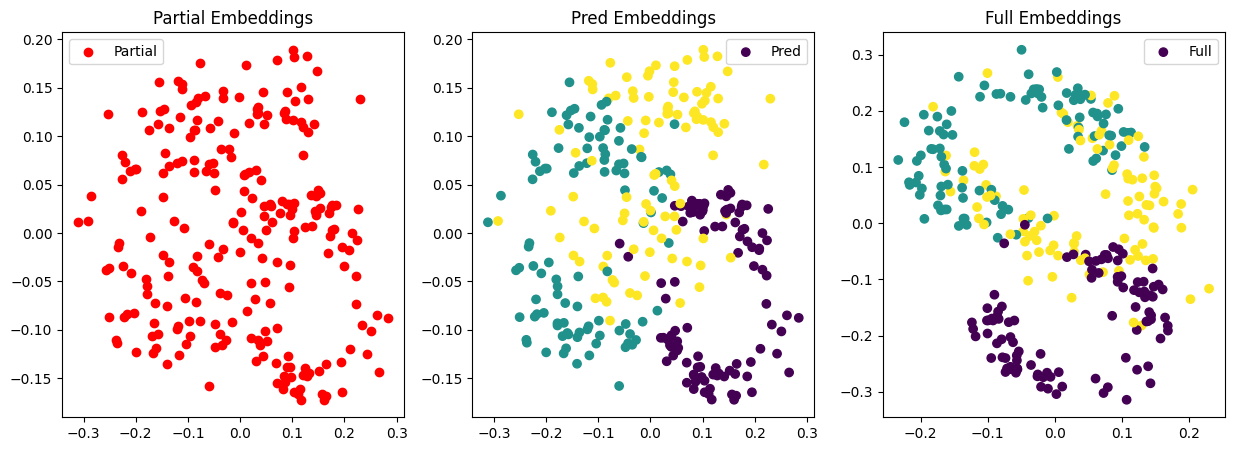

In [6]:
import matplotlib.pyplot as plt

#See if the sizes are correct
print(len(partial), len(pred), len(full))

#Plot the embeddings
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].scatter(partial[:, 0], partial[:, 1], c='r', label='Partial')
axes[0].set_title('Partial Embeddings')
axes[0].legend()

axes[1].scatter(pred[:, 0], pred[:, 1], c=pred_labels, label='Pred')
axes[1].set_title('Pred Embeddings')
axes[1].legend()

axes[2].scatter(full[:, 0], full[:, 1], c=pred_labels, label='Full') #NOTE TO MARTIAL -> YOU WANT TO MAKE SURE THE POINTS AREN'T SHUFFLED
axes[2].set_title('Full Embeddings')
axes[2].legend()

plt.show()

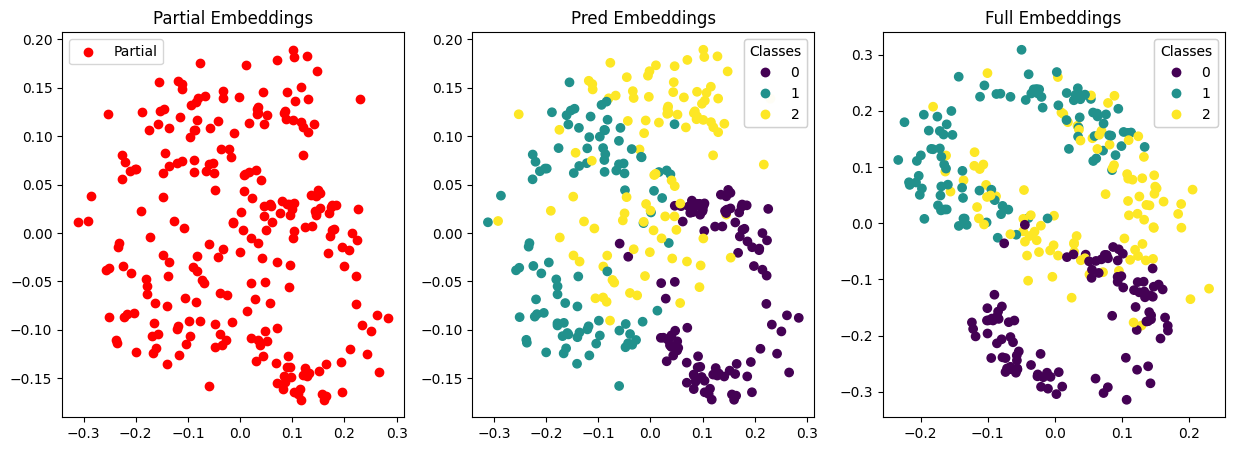

In [7]:
# Plot the embeddings
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].scatter(partial[:, 0], partial[:, 1], c='r', label='Partial')
axes[0].set_title('Partial Embeddings')
axes[0].legend()

scatter_pred = axes[1].scatter(pred[:, 0], pred[:, 1], c=pred_labels)
axes[1].set_title('Pred Embeddings')
legend_pred = axes[1].legend(*scatter_pred.legend_elements(), title="Classes")
axes[1].add_artist(legend_pred)

scatter_full = axes[2].scatter(full[:, 0], full[:, 1], c=full_labels)
axes[2].set_title('Full Embeddings')
legend_full = axes[2].legend(*scatter_full.legend_elements(), title="Classes")
axes[2].add_artist(legend_full)

plt.show()

('RF-SPUD', 'ComputerHardware', 'even', {'knn': 22, 'OD_method': 'default', 'agg_method': 'log'})


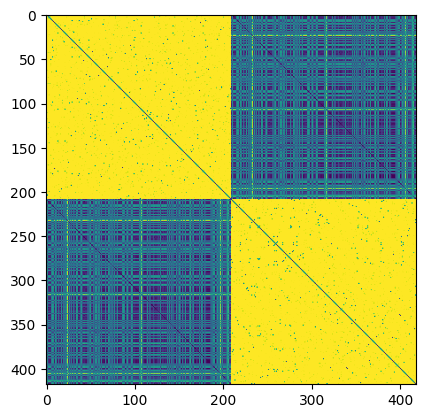

In [8]:
print(tasks[0])
emb_pred, emb_full, block_full = get_embeddings(*tasks[0], return_labels=False)
plt.imshow(block_full)

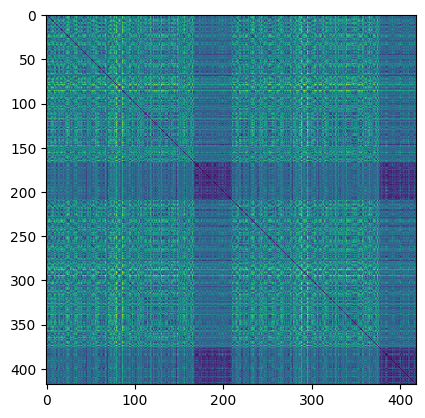

In [9]:
from scipy.spatial.distance import pdist, squareform
plt.imshow(squareform(pdist(emb_pred)))
#plt.imshow(squareform(pdist(emb_full)))

# Marshall's Tests here?

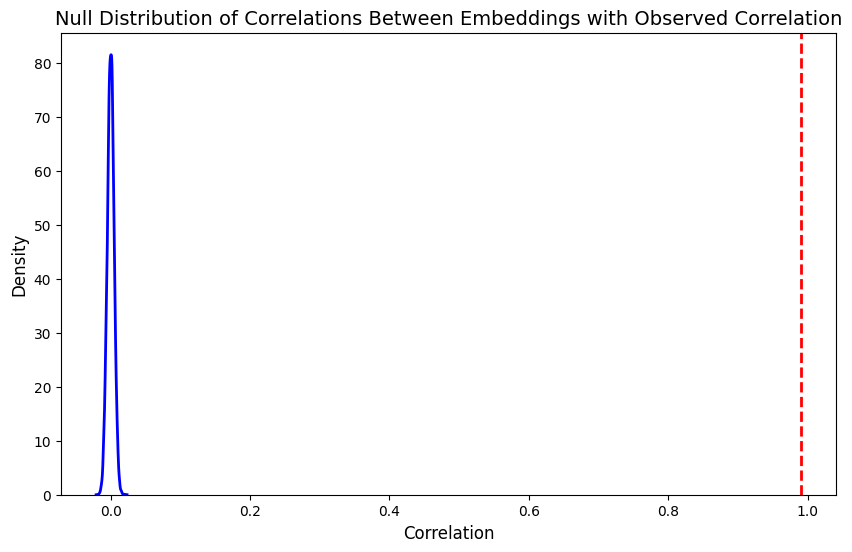

Mantel results saved to: /yunity/arusty/Graph-Manifold-Alignment/Results/Mantel/SPUD_iris_turn.json
SPUD iris turn {'knn': 10, 'OD_method': 'default', 'agg_method': 'log'}
0.9900880836094449 0.0


In [12]:
r_obs, p_value = mantel_test(*iris_task, plot = True)
print(*iris_task)
print(r_obs, p_value)

In [11]:
#Unpack all the code and run the mantel test
for i in range(5):
    task_to_run = tasks[i+10]
    print(task_to_run)
    r_obs, p_value = mantel_test(method = task_to_run[0], dataset=task_to_run[1], split = task_to_run[2], params = task_to_run[3], plot = True)
    print(r_obs, p_value)

('MASH-', 'ComputerHardware', 'random', {'knn': 42, 'page_rank': 'None', 'DTM': 'kl', 'density_normalization': False})


KeyboardInterrupt: 

In [11]:
p_value

0.0159

In [10]:
# Testing parralization loop
#Imports
from joblib import Parallel, delayed
from tqdm_joblib import tqdm_joblib
from tqdm import tqdm

with tqdm_joblib(tqdm(total=5)): #This includ]==s a progress bar :)
    with Parallel(n_jobs=-1) as parallel:
        parallel(
            delayed(mantel_test)(*task)
            for task in tasks[:5]
        )


/yunity/arusty/Graph-Manifold-Alignment/.venv/lib/python3.10/site-packages/tqdm_joblib/__init__.py:4: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm
  0%|          | 0/5 [00:00<?, ?it/s]2025-01-13 17:09:04.973177: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-13 17:09:04.991319: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-13 17:09:04.996832: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-13 17:09:05.010618: I tensorflow/core/platf

ValueError: x and y must have length at least 2.

In [11]:
def debug_mantel_test(*args):
    print(f"Arguments passed to mantel_test: {args}")
    return mantel_test(*args)

with tqdm_joblib(tqdm(total=5)): #This includes a progress bar :)
    with Parallel(n_jobs=1) as parallel:
        parallel(
            delayed(debug_mantel_test)(*task)
            for task in tasks[:5]
        )

Arguments passed to mantel_test: ('RF-SPUD', 'ComputerHardware', 'even', {'knn': 22, 'OD_method': 'default', 'agg_method': 'log'})


Mantel results saved to: /yunity/arusty/Graph-Manifold-Alignment/Results/Mantel/RF-SPUD_ComputerHardware_even.json
Arguments passed to mantel_test: ('RF-MASH-', 'ComputerHardware', 'distort', {'knn': 2, 'page_rank': 'full', 'DTM': 'log', 'density_normalization': False})
Mantel results saved to: /yunity/arusty/Graph-Manifold-Alignment/Results/Mantel/RF-MASH-_ComputerHardware_distort.json


Arguments passed to mantel_test: ('SPUD', 'ComputerHardware', 'random', {'knn': 12, 'OD_method': 'default', 'agg_method': 'log'})





896it [03:07,  4.77it/s]


ValueError: x and y must have length at least 2.

# Marshall's Vizualizations Here?